In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-deep')
pd.set_option('display.max_columns', None)
from pandas.io.json import json_normalize
import json 
import os

## Reading in CSV

After lots of cleaning and merging and reading files we were able to get all events involving goalkeepers including shots, merged with matches which include the teams and the league. This new file `goalkeeper_matches.csv` is now available to perform EDA. 

In [7]:
df = pd.read_csv('../data/goalkeeper_matches.csv') #If this doesnt work, need to download this file through icloud
                                                   #simply find file in finder and click 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45059 entries, 0 to 45058
Columns: 191 entries, Unnamed: 0 to under_pressure
dtypes: float64(111), int64(12), object(68)
memory usage: 65.7+ MB


191 columns, not even able to see data types due to number of columns

In [9]:
for column in df.columns:
    print(column)
    if column.endswith('.id'):
        print('YES')
        df.drop(columns=column, inplace=True)
        continue
    if df[column].isnull().sum() > 40000:
        df.drop(columns=column, inplace=True)

Unnamed: 0
away_score
away_team.away_team_gender
away_team.away_team_group
away_team.away_team_id
away_team.away_team_name
away_team.country.id
YES
away_team.country.name
away_team.managers
competition.competition_id
competition.competition_name
competition.country_name
competition_stage.id
YES
competition_stage.name
home_score
home_team.country.id
YES
home_team.country.name
home_team.home_team_gender
home_team.home_team_group
home_team.home_team_id
home_team.home_team_name
home_team.managers
kick_off
last_updated
match_date
match_id
match_status
match_week
metadata.data_version
metadata.shot_fidelity_version
metadata.xy_fidelity_version
referee.country.id
YES
referee.country.name
referee.id
YES
referee.name
season.season_id
season.season_name
stadium.country.id
YES
stadium.country.name
stadium.id
YES
stadium.name
50_50.outcome.id
YES
50_50.outcome.name
Unnamed: 0.1
bad_behaviour.card.id
YES
bad_behaviour.card.name
ball_receipt.outcome.id
YES
ball_receipt.outcome.name
ball_recovery.off

In [10]:
df.shape

(45059, 66)

We got rid of over 100 columns

Let's see how many more we can get rid of that have no purpose to us. 

In [11]:
df.iloc[:, :30].isnull().sum()

Unnamed: 0                            0
away_score                         2954
away_team.away_team_gender         2954
away_team.away_team_group         39545
away_team.away_team_id             2954
away_team.away_team_name           2954
away_team.country.name             3129
away_team.managers                17214
competition.competition_id         2954
competition.competition_name       2954
competition.country_name           2954
competition_stage.name             2954
home_score                         2954
home_team.country.name             3029
home_team.home_team_gender         2954
home_team.home_team_group         39545
home_team.home_team_id             2954
home_team.home_team_name           2954
home_team.managers                17214
kick_off                           2954
last_updated                       2954
match_date                         2954
match_id                              0
match_status                       2954
match_week                         2954


In [12]:
df.drop(columns=['away_team.away_team_group', 'home_team.home_team_group', 'referee.country.name', 'away_team.managers', 'home_team.managers'], inplace=True)

In [13]:
df.iloc[:, 30:].isnull().sum()

duration                      2333
goalkeeper.body_part.name    39118
goalkeeper.end_location      32354
goalkeeper.outcome.name      33421
goalkeeper.position.name     24444
goalkeeper.technique.name    37071
goalkeeper.type.name         20643
id                               0
index                            0
location                        71
minute                           0
period                           0
play_pattern.name                0
player.name                      0
position.name                    0
possession                       0
possession_team.name             0
related_events                 274
second                           0
shot.body_part.name          24416
shot.end_location            24416
shot.first_time              39557
shot.freeze_frame            24675
shot.key_pass_id             30597
shot.outcome.name            24416
shot.statsbomb_xg            24417
shot.technique.name          24416
shot.type.name               24416
team.name           

In [14]:
df.drop(columns=['shot.key_pass_id', 'shot.first_time', 'related_events', 'Unnamed: 0'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45059 entries, 0 to 45058
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   away_score                      42105 non-null  float64
 1   away_team.away_team_gender      42105 non-null  object 
 2   away_team.away_team_id          42105 non-null  float64
 3   away_team.away_team_name        42105 non-null  object 
 4   away_team.country.name          41930 non-null  object 
 5   competition.competition_id      42105 non-null  float64
 6   competition.competition_name    42105 non-null  object 
 7   competition.country_name        42105 non-null  object 
 8   competition_stage.name          42105 non-null  object 
 9   home_score                      42105 non-null  float64
 10  home_team.country.name          42030 non-null  object 
 11  home_team.home_team_gender      42105 non-null  object 
 12  home_team.home_team_id          

Text(0.5, 1.0, 'Female vs Male')

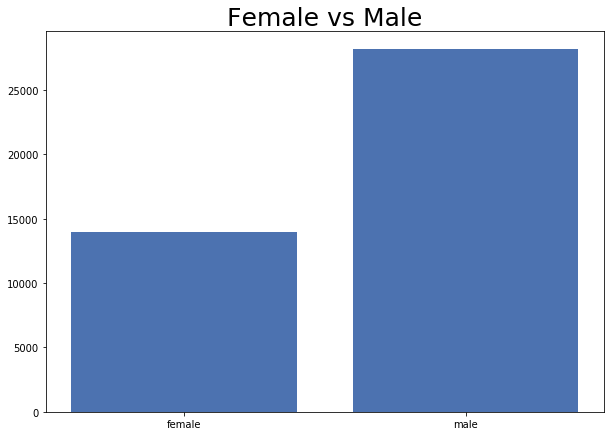

In [16]:
plt.figure(figsize=(10,7))
plt.bar(df.groupby('away_team.away_team_gender').count().iloc[:, 0].index, df.groupby('away_team.away_team_gender').count().iloc[:, 0].values)
plt.title('Female vs Male', size=25)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

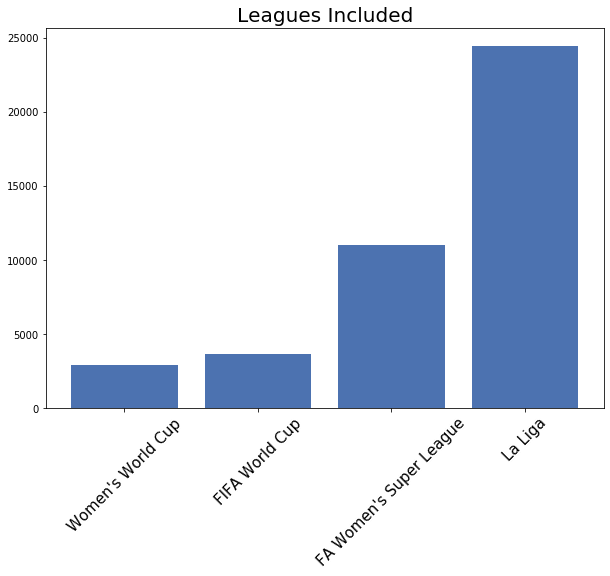

In [17]:
plt.figure(figsize=(10,7))
plt.bar(df.groupby('competition.competition_name').count().sort_values(by='away_score', ascending=True).iloc[:, 0].index, df.groupby('competition.competition_name').count().sort_values(by='away_score', ascending=True).iloc[:, 0].values)
plt.title('Leagues Included', size=20)
plt.xticks(rotation=45, size=15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45059 entries, 0 to 45058
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   away_score                      42105 non-null  float64
 1   away_team.away_team_gender      42105 non-null  object 
 2   away_team.away_team_id          42105 non-null  float64
 3   away_team.away_team_name        42105 non-null  object 
 4   away_team.country.name          41930 non-null  object 
 5   competition.competition_id      42105 non-null  float64
 6   competition.competition_name    42105 non-null  object 
 7   competition.country_name        42105 non-null  object 
 8   competition_stage.name          42105 non-null  object 
 9   home_score                      42105 non-null  float64
 10  home_team.country.name          42030 non-null  object 
 11  home_team.home_team_gender      42105 non-null  object 
 12  home_team.home_team_id          

In [19]:
df['goalkeeper.technique.name'].unique()

array([nan, 'Standing', 'Diving'], dtype=object)

In [20]:
df.groupby('shot.body_part.name').count().iloc[:, 0]

shot.body_part.name
Head           2709
Left Foot      6395
Other            50
Right Foot    10156
Name: away_score, dtype: int64

In [21]:
df['shot.type.name'].unique()

array(['Open Play', nan, 'Free Kick', 'Penalty', 'Corner', 'Kick Off'],
      dtype=object)

In [22]:
df['match_date'] = pd.to_datetime(df['match_date'])

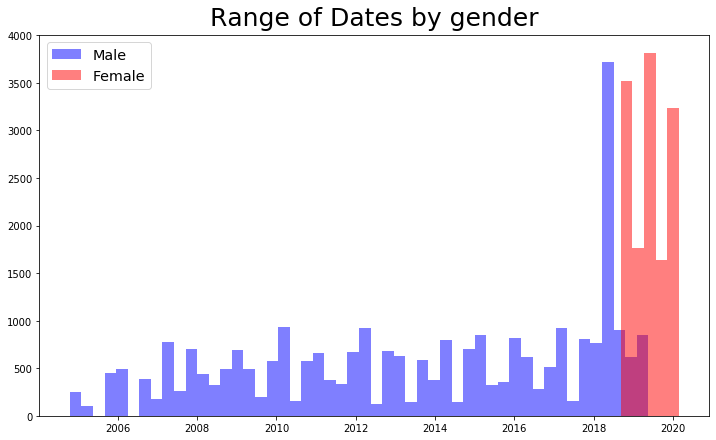

In [23]:
plt.figure(figsize=(12,7))
plt.hist(df['match_date'].sort_values().dropna()[df['away_team.away_team_gender'] == 'male'], bins=50, color='blue', label='Male', alpha=0.5)
plt.hist(df['match_date'].sort_values().dropna()[df['away_team.away_team_gender'] == 'female'], bins=5, color='red', label='Female', alpha=0.5)
plt.title('Range of Dates by gender', size=25, pad=10)
plt.legend(loc='upper left', fontsize='x-large')

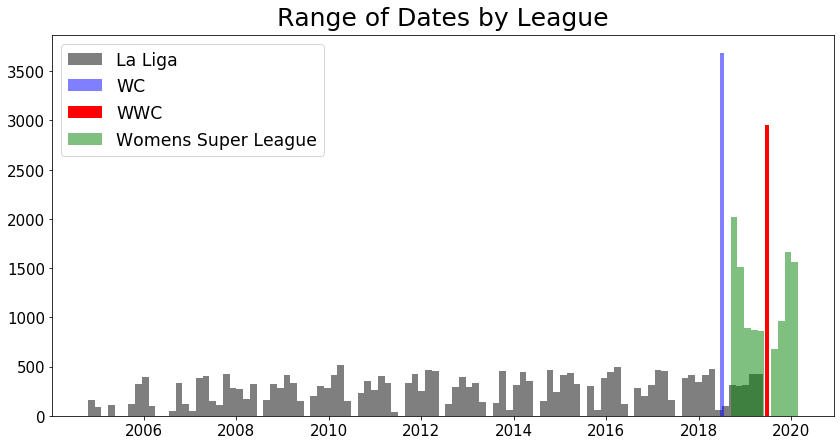

In [24]:
plt.figure(figsize=(14,7))
plt.hist(df['match_date'].sort_values().dropna()[df['competition.competition_name'] == 'La Liga'], bins=100, color='black', label='La Liga', alpha=0.5)
plt.hist(df['match_date'].sort_values().dropna()[df['competition.competition_name'] == 'FIFA World Cup'], bins=1, color='blue', label='WC', alpha=0.5)
plt.hist(df['match_date'].sort_values().dropna()[df['competition.competition_name'] == "Women's World Cup"], bins=1, color='red', label='WWC')
plt.hist(df['match_date'].sort_values().dropna()[df['competition.competition_name'] == "FA Women's Super League"], bins=10, color='green', label='Womens Super League', alpha=0.5)
plt.title('Range of Dates by League', size=25, pad=10)
plt.legend(loc='upper left', fontsize='xx-large')
plt.yticks(size=15)
plt.xticks(size=15);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45059 entries, 0 to 45058
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   away_score                      42105 non-null  float64       
 1   away_team.away_team_gender      42105 non-null  object        
 2   away_team.away_team_id          42105 non-null  float64       
 3   away_team.away_team_name        42105 non-null  object        
 4   away_team.country.name          41930 non-null  object        
 5   competition.competition_id      42105 non-null  float64       
 6   competition.competition_name    42105 non-null  object        
 7   competition.country_name        42105 non-null  object        
 8   competition_stage.name          42105 non-null  object        
 9   home_score                      42105 non-null  float64       
 10  home_team.country.name          42030 non-null  object        
 11  ho

In [26]:
df.groupby('shot.technique.name').count().iloc[:, 0].sort_values(ascending=False)

shot.technique.name
Normal           15932
Half Volley       1708
Volley            1146
Lob                278
Overhead Kick      106
Diving Header       77
Backheel            63
Name: away_score, dtype: int64

Text(0.5, 1.0, 'Shot Techniques')

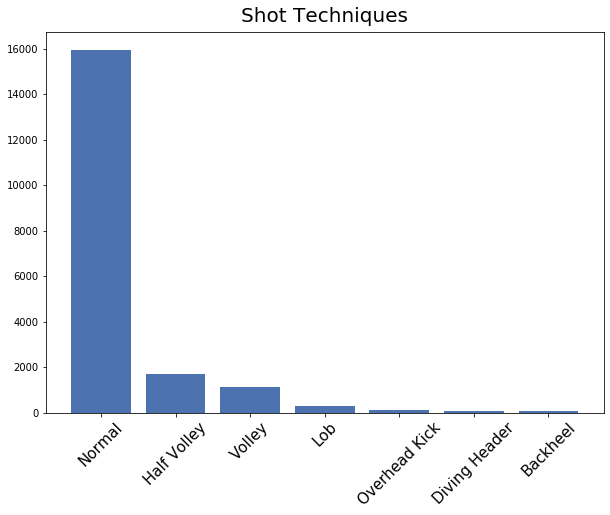

In [27]:
plt.figure(figsize=(10,7))
plt.bar(df.groupby('shot.technique.name').count().iloc[:, 0].sort_values(ascending=False).index, df.groupby('shot.technique.name').count().iloc[:, 0].sort_values(ascending=False).values)
plt.xticks(rotation=45, size=15)
plt.title('Shot Techniques', size=20, pad=10)


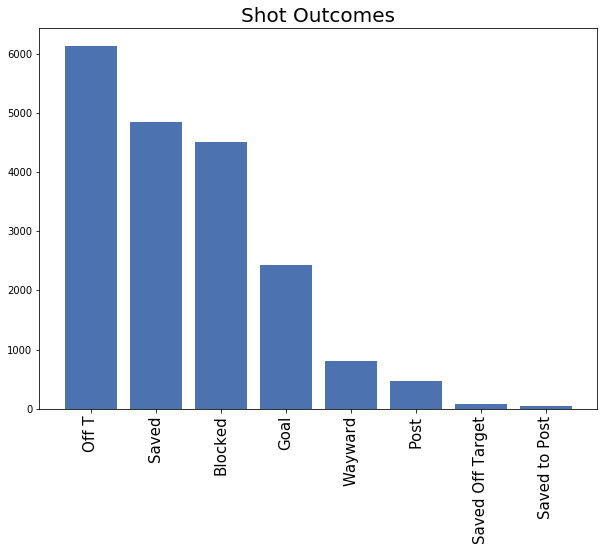

In [28]:
plt.figure(figsize=(10,7))
plt.bar(df.groupby('shot.outcome.name').count().iloc[:, 0].sort_values(ascending=False).index, df.groupby('shot.outcome.name').count().iloc[:, 0].sort_values(ascending=False).values)
plt.xticks(rotation=90, size=15)
plt.title('Shot Outcomes', size=20);

In [29]:
df.groupby('match_id').count()

,away_score,away_team.away_team_gender,away_team.away_team_id,away_team.away_team_name,away_team.country.name,competition.competition_id,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_status,match_week,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,Unnamed: 0.1,duration,goalkeeper.body_part.name,goalkeeper.end_location,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,id,index,location,minute,period,play_pattern.name,player.name,position.name,possession,possession_team.name,second,shot.body_part.name,shot.end_location,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,34,8,0,18,33,8,40,74,74,73,74,74,74,74,74,74,74,74,34,34,34,34,33,34,34,74,74,74
7430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,26,8,12,18,26,8,30,55,55,54,55,55,55,55,55,55,55,55,25,25,25,25,25,25,25,55,55,55
7443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,37,12,20,29,37,19,49,86,86,86,86,86,86,86,86,86,86,86,37,37,36,37,37,37,37,86,86,86
7444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,45,11,31,19,44,11,51,96,96,96,96,96,96,96,96,96,96,96,45,45,45,45,45,45,45,96,96,96
7445,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,19,4,12,13,19,4,26,45,45,45,45,45,45,45,45,45,45,45,19,19,19,19,19,19,19,45,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275151,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,0,0,35,35,7,8,11,16,8,19,35,35,35,35,35,35,35,35,35,35,35,16,16,16,16,16,16,16,35,35,35
2275153,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,4,7,13,13,7,20,33,33,33,33,33,33,33,33,33,33,33,13,13,13,13,13,13,13,33,33,33
2275154,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,8,14,16,21,7,30,51,51,51,51,51,51,51,51,51,51,51,21,21,20,21,21,21,21,51,51,51


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45059 entries, 0 to 45058
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   away_score                      42105 non-null  float64       
 1   away_team.away_team_gender      42105 non-null  object        
 2   away_team.away_team_id          42105 non-null  float64       
 3   away_team.away_team_name        42105 non-null  object        
 4   away_team.country.name          41930 non-null  object        
 5   competition.competition_id      42105 non-null  float64       
 6   competition.competition_name    42105 non-null  object        
 7   competition.country_name        42105 non-null  object        
 8   competition_stage.name          42105 non-null  object        
 9   home_score                      42105 non-null  float64       
 10  home_team.country.name          42030 non-null  object        
 11  ho

In [31]:
df.shape

(45059, 57)

In [32]:
df.iloc[25000:30000, :]

,away_score,away_team.away_team_gender,away_team.away_team_id,away_team.away_team_name,away_team.country.name,competition.competition_id,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,Unnamed: 0.1,duration,goalkeeper.body_part.name,goalkeeper.end_location,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,id,index,location,minute,period,play_pattern.name,player.name,position.name,possession,possession_team.name,second,shot.body_part.name,shot.end_location,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name
25000,0.0,male,217.0,Barcelona,Spain,11.0,La Liga,Spain,Regular Season,1.0,Spain,male,210.0,Real Sociedad,21:00:00.000,2019-12-16T23:09:16.168756,2015-01-04,266240,available,17.0,1.1.0,2.0,2.0,Carlos Del Cerro,26.0,2014/2015,Spain,Estadio Municipal de Anoeta,3216,0.151800,NaN,NaN,NaN,NaN,NaN,NaN,18b66842-8347-4ef9-a568-25ea11e1617f,3217,"[96.9, 28.6]",82,2,From Corner,Íñigo Martínez Berridi,Left Center Back,159,Real Sociedad,25,Right Foot,"[99.7, 29.9]","[{'location': [105.0, 38.2], 'player': {'id': ...",Blocked,0.022185,Normal,Open Play,Real Sociedad,00:37:25.655,Shot
25001,0.0,male,217.0,Barcelona,Spain,11.0,La Liga,Spain,Regular Season,1.0,Spain,male,210.0,Real Sociedad,21:00:00.000,2019-12-16T23:09:16.168756,2015-01-04,266240,available,17.0,1.1.0,2.0,2.0,Carlos Del Cerro,26.0,2014/2015,Spain,Estadio Municipal de Anoeta,3218,0.000000,NaN,"[1.7, 42.0]",NaN,Set,NaN,Shot Faced,751edf33-59a6-4b64-abd1-e7f943685126,3219,"[1.7, 42.0]",82,2,From Corner,Claudio Andrés Bravo Muñoz,Goalkeeper,159,Real Sociedad,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:37:25.840,Goal Keeper
25002,0.0,male,217.0,Barcelona,Spain,11.0,La Liga,Spain,Regular Season,1.0,Spain,male,210.0,Real Sociedad,21:00:00.000,2019-12-16T23:09:16.168756,2015-01-04,266240,available,17.0,1.1.0,2.0,2.0,Carlos Del Cerro,26.0,2014/2015,Spain,Estadio Municipal de Anoeta,3347,0.000000,NaN,NaN,Success In Play,NaN,NaN,Smother,065bdb50-f14a-491e-b0a8-1378d358c838,3348,"[11.9, 31.7]",85,2,From Free Kick,Gerónimo Rulli,Goalkeeper,165,Barcelona,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Sociedad,00:40:24.195,Goal Keeper
25003,0.0,male,217.0,Barcelona,Spain,11.0,La Liga,Spain,Regular Season,1.0,Spain,male,210.0,Real Sociedad,21:00:00.000,2019-12-16T23:09:16.168756,2015-01-04,266240,available,17.0,1.1.0,2.0,2.0,Carlos Del Cerro,26.0,2014/2015,Spain,Estadio Municipal de Anoeta,3389,0.418500,NaN,NaN,NaN,NaN,NaN,NaN,60bad187-1467-418d-938a-b2b35de0361e,3390,"[111.1, 45.3]",86,2,From Corner,Luis Alberto Suárez Díaz,Center Forward,166,Barcelona,10,Head,"[118.5, 42.7, 2.1]","[{'location': [99.5, 18.3], 'player': {'id': 6...",Saved,0.121674,Normal,Open Play,Barcelona,00:41:10.265,Shot
25004,0.0,male,217.0,Barcelona,Spain,11.0,La Liga,Spain,Regular Season,1.0,Spain,male,210.0,Real Sociedad,21:00:00.000,2019-12-16T23:09:16.168756,2015-01-04,266240,available,17.0,1.1.0,2.0,2.0,Carlos Del Cerro,26.0,2014/2015,Spain,Estadio Municipal de Anoeta,3390,0.000000,Right Hand,NaN,In Play Danger,Set,Diving,Shot Saved,15158930-a730-49cd-8efb-c6df49a758cb,3391,"[1.4, 37.5]",86,2,From Corner,Gerónimo Rulli,Goalkeeper,166,Barcelona,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Sociedad,00:41:10.684,Goal Keeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,female,966.0,Liverpool WFC,England,37.0,FA Women's Super League,England,Regular Season,1.0,England,femal

columns that need datetime `kick_off, last_updated, match_date, timestamp`

columns that need to be integer `away_score, home_score, match_id, match_week, season.season_id, minute, period, second`

columns that need to be floats `duration, shot.statsbomb_xg`

columns that need dropped `possession, Unnamed: 0.1, away_team.away_team_id, home_team.home_team.id, competition.competition_id, match_status, id`

columns that need work `goalkeeper.end_location, location, shot.end_location` 

In [33]:
df['kick_off'] = pd.to_datetime(df['kick_off'])
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['match_date'] = pd.to_datetime(df['match_date'])

df['duration'].astype(float)
df['shot.statsbomb_xg'].astype(float)
df['away_score'].astype('Int64')

df['home_score'].astype('Int64')
df['match_id'].astype('Int64')
df['match_week'].astype('Int64')
df['season.season_id'].astype('Int64')
df['minute'].astype('Int64')
df['period'].astype('Int64') 
df['second'].astype('Int64')

df.drop(columns=['possession', 'Unnamed: 0.1', 'away_team.away_team_id', 'competition.competition_id', 'match_status', 'id'], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45059 entries, 0 to 45058
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   away_score                      42105 non-null  float64       
 1   away_team.away_team_gender      42105 non-null  object        
 2   away_team.away_team_name        42105 non-null  object        
 3   away_team.country.name          41930 non-null  object        
 4   competition.competition_name    42105 non-null  object        
 5   competition.country_name        42105 non-null  object        
 6   competition_stage.name          42105 non-null  object        
 7   home_score                      42105 non-null  float64       
 8   home_team.country.name          42030 non-null  object        
 9   home_team.home_team_gender      42105 non-null  object        
 10  home_team.home_team_id          42105 non-null  float64       
 11  ho

In [35]:
df.shape

(45059, 51)

In [36]:
float(df['goalkeeper.end_location'][45056].replace('[', '').replace(']', '').split(', ')[0])

1.2

In [37]:
df['goalkeeper_xloc'] = np.nan
df['goalkeeper_yloc'] = np.nan

In [38]:
for i in range(df['goalkeeper.end_location'].shape[0]):
    fix_string = df['goalkeeper.end_location'][i]
    if type(fix_string) == float:
        continue
    x_loc = float(fix_string.replace('[', '').replace(']', '').split(', ')[0])
    y_loc = float(fix_string.replace('[', '').replace(']', '').split(', ')[1])

    df['goalkeeper_xloc'][i] = x_loc
    df['goalkeeper_yloc'][i] = y_loc

/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [39]:
df.head(10)

,away_score,away_team.away_team_gender,away_team.away_team_name,away_team.country.name,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_id,match_week,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,duration,goalkeeper.body_part.name,goalkeeper.end_location,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,index,location,minute,period,play_pattern.name,player.name,position.name,possession_team.name,second,shot.body_part.name,shot.end_location,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name,goalkeeper_xloc,goalkeeper_yloc
0,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,2.0,2.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.733565,NaN,NaN,NaN,NaN,NaN,NaN,158,"[112.0, 56.6]",3,1,From Throw In,Daniel Alves da Silva,Right Back,Barcelona,18,Right Foot,"[118.9, 43.8, 0.7]","[{'location': [109.3, 46.7], 'player': {'id': ...",Saved,0.039837,Normal,Open Play,Barcelona,00:03:18.221,Shot,NaN,NaN
1,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,2.0,2.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,Both Hands,NaN,Success,Set,Standing,Shot Saved,159,"[1.8, 37.1]",3,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:03:18.955,Goal Keeper,NaN,NaN
2,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,2.0,2.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.854500,NaN,NaN,NaN,NaN,NaN,NaN,203,"[103.0, 34.2]",4,1,From Free Kick,Lionel Andrés Messi Cuccittini,Right Wing,Barcelona,43,Left Foot,"[120.0, 41.8, 0.2]","[{'location': [104.4, 34.1], 'player': {'id': ...",Goal,0.105479,Normal,Open Play,Barcelona,00:04:43.673,Shot,NaN,NaN
3,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,2.0,2.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,NaN,No Touch,Set,Diving,Goal Conceded,204,"[4.3, 42.1]",4,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:04:44.527,Goal Keeper,NaN,NaN
4,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,2.0,2.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,NaN,Success,NaN,NaN,Collected,418,"[7.6, 40.3]",9,1,From Keeper,Víctor Valdés Arribas,Goalkeeper,Barcelona,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:09:15.043,Goal Keeper,NaN,NaN
5,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,2.0,2.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,NaN,In Play Safe,NaN,NaN,Punch,685,"[8.6, 44.9]",16,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:16:28.029,Goal Keeper,NaN,NaN
6,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,2.0,2.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,1.104565,NaN,NaN,NaN,NaN,NaN,NaN,951,"[93.4, 59.0]",22,1,From Free Kick,Dani

In [40]:
df['x_loc'] = np.nan
df['y_loc'] = np.nan

for i in range(df.shape[0]):
    fix_string = df['location'][i]
    if type(fix_string) == float:
        continue
    y_loc = float(fix_string.replace('[', '').replace(']', '').split(', ')[1])
    x_loc = float(fix_string.replace('[', '').replace(']', '').split(', ')[0])

    df['x_loc'][i] = x_loc
    df['y_loc'][i] = y_loc

    

/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [41]:
df['shot_xloc'] = np.nan
df['shot_yloc'] = np.nan
df['shot_zloc'] = np.nan

for i in range(df.shape[0]):
    fix_string = df['shot.end_location'][i]
    if type(fix_string) == float:
        continue
    lst = fix_string.replace('[', '').replace(']', '').split(', ')
    x_loc = float(lst[0])
    y_loc = float(lst[1])
    
    if len(lst) == 3:
        z_loc = float(lst[2])
        df['shot_zloc'][i] = z_loc
    
    df['shot_xloc'][i] = x_loc
    df['shot_yloc'][i] = y_loc


/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
df.drop(columns=['goalkeeper.end_location', 'location', 'shot.end_location'], inplace=True)

In [43]:
df.drop(columns=['metadata.shot_fidelity_version', 'metadata.xy_fidelity_version'], inplace = True)

In [44]:
df.head()

,away_score,away_team.away_team_gender,away_team.away_team_name,away_team.country.name,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_id,match_week,metadata.data_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,duration,goalkeeper.body_part.name,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,index,minute,period,play_pattern.name,player.name,position.name,possession_team.name,second,shot.body_part.name,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name,goalkeeper_xloc,goalkeeper_yloc,x_loc,y_loc,shot_xloc,shot_yloc,shot_zloc
0,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.733565,NaN,NaN,NaN,NaN,NaN,158,3,1,From Throw In,Daniel Alves da Silva,Right Back,Barcelona,18,Right Foot,"[{'location': [109.3, 46.7], 'player': {'id': ...",Saved,0.039837,Normal,Open Play,Barcelona,00:03:18.221,Shot,NaN,NaN,112.0,56.6,118.9,43.8,0.7
1,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,Both Hands,Success,Set,Standing,Shot Saved,159,3,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,18,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:03:18.955,Goal Keeper,NaN,NaN,1.8,37.1,NaN,NaN,NaN
2,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.854500,NaN,NaN,NaN,NaN,NaN,203,4,1,From Free Kick,Lionel Andrés Messi Cuccittini,Right Wing,Barcelona,43,Left Foot,"[{'location': [104.4, 34.1], 'player': {'id': ...",Goal,0.105479,Normal,Open Play,Barcelona,00:04:43.673,Shot,NaN,NaN,103.0,34.2,120.0,41.8,0.2
3,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,No Touch,Set,Diving,Goal Conceded,204,4,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,44,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:04:44.527,Goal Keeper,NaN,NaN,4.3,42.1,NaN,NaN,NaN
4,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,Success,NaN,NaN,Collected,418,9,1,From Keeper,Víctor Valdés Arribas,Goalkeeper,Barcelona,15,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:09:15.043,Goal Keeper,NaN,NaN,7.6,40.3,NaN,NaN,NaN


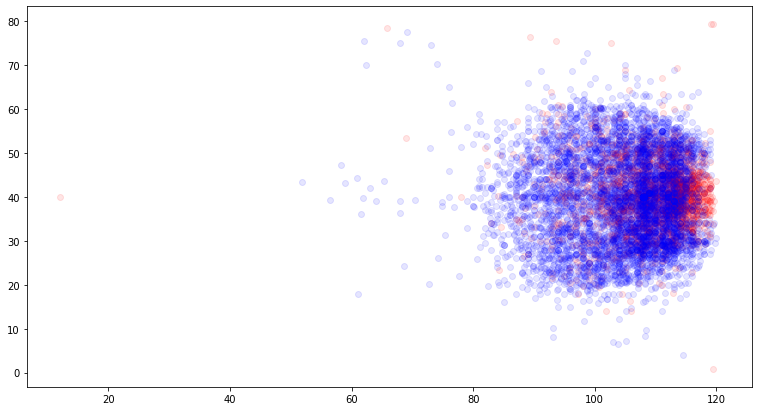

In [45]:
fig, ax = plt.subplots(figsize=(13,7))
plt.scatter(df[df['shot.outcome.name'] == 'Goal']['x_loc'], df[df['shot.outcome.name'] == 'Goal']['y_loc'], color='red', alpha=0.1)
plt.scatter(df[df['shot.outcome.name'] == 'Saved']['x_loc'], df[df['shot.outcome.name'] == 'Saved']['y_loc'], color='blue', alpha=0.1)

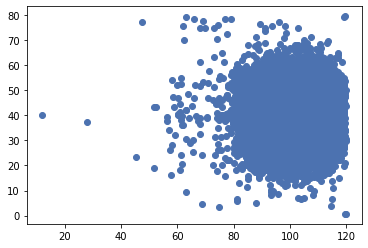

In [46]:
plt.scatter(df[df['type.name'] == 'Shot']['x_loc'], df[df['type.name'] == 'Shot']['y_loc'])

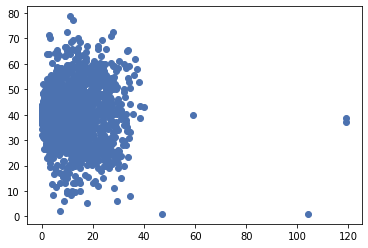

In [47]:
plt.scatter(df[df['type.name'] == 'Goal Keeper']['x_loc'], df[df['type.name'] == 'Goal Keeper']['y_loc'])

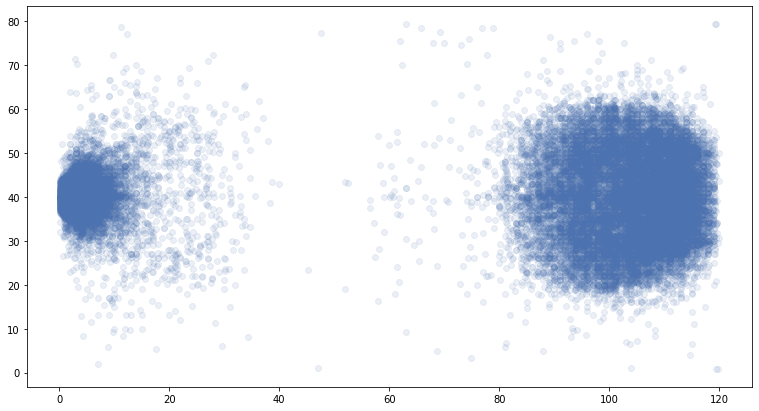

In [48]:
fig, ax = plt.subplots(figsize=(13,7))
plt.scatter(df['x_loc'], df['y_loc'], alpha=0.1)

In [49]:
df['type.name'].unique()

array(['Shot', 'Goal Keeper'], dtype=object)

In [50]:
df.head()

,away_score,away_team.away_team_gender,away_team.away_team_name,away_team.country.name,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_id,match_week,metadata.data_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,duration,goalkeeper.body_part.name,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,index,minute,period,play_pattern.name,player.name,position.name,possession_team.name,second,shot.body_part.name,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name,goalkeeper_xloc,goalkeeper_yloc,x_loc,y_loc,shot_xloc,shot_yloc,shot_zloc
0,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.733565,NaN,NaN,NaN,NaN,NaN,158,3,1,From Throw In,Daniel Alves da Silva,Right Back,Barcelona,18,Right Foot,"[{'location': [109.3, 46.7], 'player': {'id': ...",Saved,0.039837,Normal,Open Play,Barcelona,00:03:18.221,Shot,NaN,NaN,112.0,56.6,118.9,43.8,0.7
1,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,Both Hands,Success,Set,Standing,Shot Saved,159,3,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,18,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:03:18.955,Goal Keeper,NaN,NaN,1.8,37.1,NaN,NaN,NaN
2,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.854500,NaN,NaN,NaN,NaN,NaN,203,4,1,From Free Kick,Lionel Andrés Messi Cuccittini,Right Wing,Barcelona,43,Left Foot,"[{'location': [104.4, 34.1], 'player': {'id': ...",Goal,0.105479,Normal,Open Play,Barcelona,00:04:43.673,Shot,NaN,NaN,103.0,34.2,120.0,41.8,0.2
3,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,No Touch,Set,Diving,Goal Conceded,204,4,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,44,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:04:44.527,Goal Keeper,NaN,NaN,4.3,42.1,NaN,NaN,NaN
4,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,Success,NaN,NaN,Collected,418,9,1,From Keeper,Víctor Valdés Arribas,Goalkeeper,Barcelona,15,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:09:15.043,Goal Keeper,NaN,NaN,7.6,40.3,NaN,NaN,NaN


(20, 60)

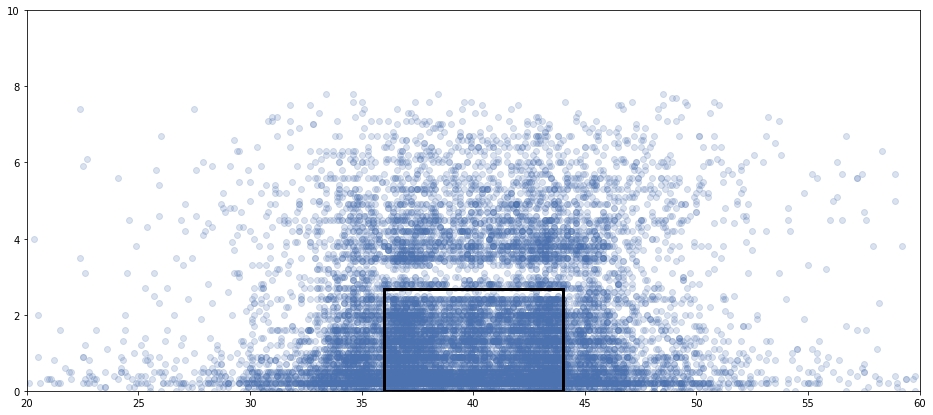

In [52]:
import matplotlib
fig, ax = plt.subplots(figsize=(16,7))
plt.scatter(df['shot_yloc'], df['shot_zloc'], alpha=0.2)
rect = matplotlib.patches.Rectangle((36, 0), 8, 2.67, lw=3, fill=False)
ax.add_patch(rect)
plt.ylim(0, 10)
plt.xlim(20, 60)


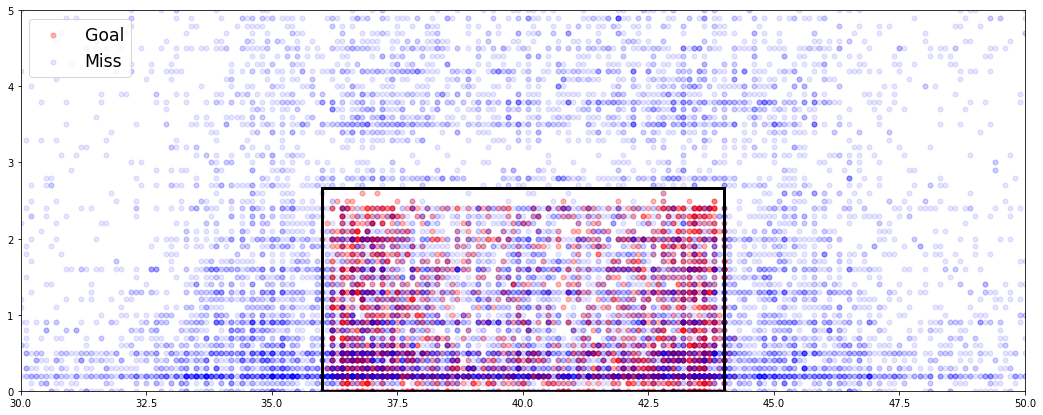

In [54]:
fig, ax = plt.subplots(figsize=(18,7))
plt.scatter(df[df['shot.outcome.name'] == 'Goal']['shot_yloc'], df[df['shot.outcome.name'] == 'Goal']['shot_zloc'], color='red', alpha=.3, s=25, label='Goal')
plt.scatter(df[df['shot.outcome.name'] != 'Goal']['shot_yloc'], df[df['shot.outcome.name'] != 'Goal']['shot_zloc'], color='blue', alpha=.1, s=25, label='Miss')
rect = matplotlib.patches.Rectangle((36, 0), 8, 2.67, lw=3, fill=False)
ax.add_patch(rect)
plt.ylim(0, 5)
plt.xlim(30, 50)
plt.legend(loc='upper left', fontsize='xx-large')

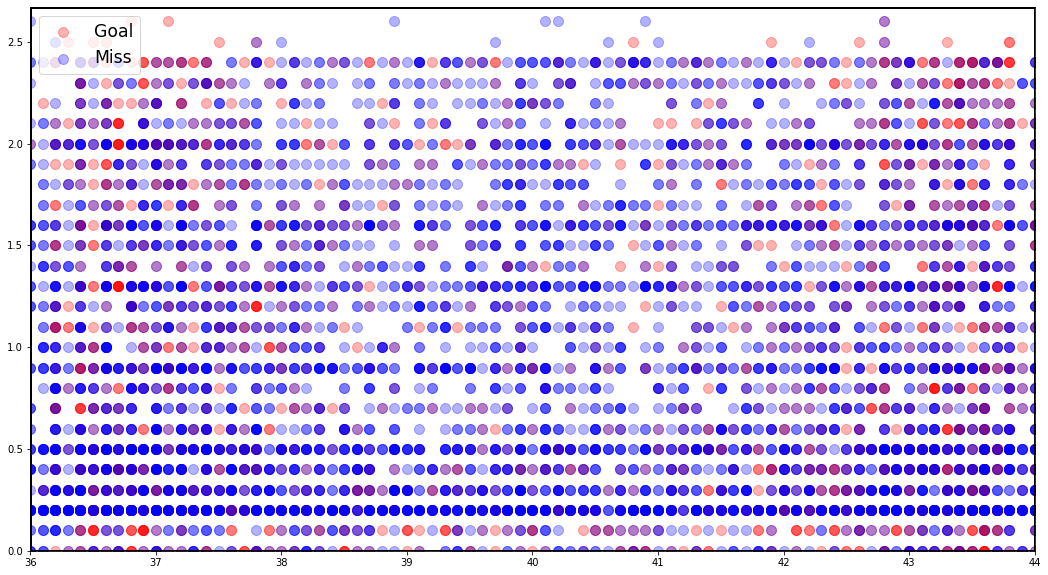

In [55]:
fig, ax = plt.subplots(figsize=(18,10))
plt.scatter(df[df['shot.outcome.name'] == 'Goal']['shot_yloc'], df[df['shot.outcome.name'] == 'Goal']['shot_zloc'], color='red', alpha=.3, s=100, label='Goal')
plt.scatter(df[df['shot.outcome.name'] != 'Goal']['shot_yloc'], df[df['shot.outcome.name'] != 'Goal']['shot_zloc'], color='blue', alpha=.3, s=100, label='Miss')
rect = matplotlib.patches.Rectangle((36, 0), 8, 2.67, lw=3, fill=False)
ax.add_patch(rect)
plt.ylim(0, 2.67)
plt.xlim(36, 44)
plt.legend(loc='upper left', fontsize='xx-large')

/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/morganabbitt/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


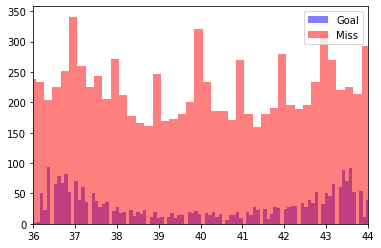

In [56]:
plt.hist(df[df['shot.outcome.name'] == 'Goal']['shot_yloc'], color='blue', bins=100, alpha=0.5, label='Goal') 
plt.hist(df[df['shot.outcome.name'] != 'Goal']['shot_yloc'], color='red', bins=400, alpha=0.5, label='Miss')
plt.xlim(36, 44)
plt.legend()

In [57]:
df[df['player.name'] == 'Andrés Palop Cervera']

,away_score,away_team.away_team_gender,away_team.away_team_name,away_team.country.name,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_id,match_week,metadata.data_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,duration,goalkeeper.body_part.name,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,index,minute,period,play_pattern.name,player.name,position.name,possession_team.name,second,shot.body_part.name,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name,goalkeeper_xloc,goalkeeper_yloc,x_loc,y_loc,shot_xloc,shot_yloc,shot_zloc
1,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.0,Both Hands,Success,Set,Standing,Shot Saved,159,3,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,18,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:03:18.955,Goal Keeper,NaN,NaN,1.8,37.1,NaN,NaN,NaN
3,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.0,NaN,No Touch,Set,Diving,Goal Conceded,204,4,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,44,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:04:44.527,Goal Keeper,NaN,NaN,4.3,42.1,NaN,NaN,NaN
5,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.0,NaN,In Play Safe,NaN,NaN,Punch,685,16,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,28,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:16:28.029,Goal Keeper,NaN,NaN,8.6,44.9,NaN,NaN,NaN
7,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.0,NaN,NaN,Set,NaN,Shot Faced,952,22,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,45,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:22:45.530,Goal Keeper,7.5,38.4,7.5,38.4,NaN,NaN,NaN
9,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.0,NaN,NaN,Set,NaN,Shot Faced,955,22,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,45,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:22:45.951,Goal Keeper,1.2,40.8,1.2,40.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,2.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,0.0,Spain,male,213.0,Sevilla,2020-07-18 20:00:00,2019-12-16 23:09:16.168756,2012-03-17,69326,28.0,1.1.0,José González,23.0,2011/2012,Spain,Estadio Ramón Sánchez Pizjuán,0.0,NaN,NaN,Set,NaN,Shot Faced,3359,75,2,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,54,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:30:54.775,Goal Keeper,0.7,39.9,0.7,39.9,NaN,NaN,NaN
39505,2.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,0.0,Spain,male,213.0,Sevilla,2020-07-18 20:00:00,2019-12-16 23:09:16.168756,2012-03-17,69326,28.0,1.1.0,José González,23.0,2011/2012,Spain,Estadio Ramón Sánchez Pizjuán,0.0,NaN,NaN,Set,NaN,Shot Faced,3363,75,2,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,59,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:30:59.081,Goal Keeper,1.4,39.5,1.4,39.5,N

In [58]:
df.head(15)

,away_score,away_team.away_team_gender,away_team.away_team_name,away_team.country.name,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_id,match_week,metadata.data_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,duration,goalkeeper.body_part.name,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,index,minute,period,play_pattern.name,player.name,position.name,possession_team.name,second,shot.body_part.name,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name,goalkeeper_xloc,goalkeeper_yloc,x_loc,y_loc,shot_xloc,shot_yloc,shot_zloc
0,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.733565,NaN,NaN,NaN,NaN,NaN,158,3,1,From Throw In,Daniel Alves da Silva,Right Back,Barcelona,18,Right Foot,"[{'location': [109.3, 46.7], 'player': {'id': ...",Saved,0.039837,Normal,Open Play,Barcelona,00:03:18.221,Shot,NaN,NaN,112.0,56.6,118.9,43.8,0.7
1,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,Both Hands,Success,Set,Standing,Shot Saved,159,3,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,18,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:03:18.955,Goal Keeper,NaN,NaN,1.8,37.1,NaN,NaN,NaN
2,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.854500,NaN,NaN,NaN,NaN,NaN,203,4,1,From Free Kick,Lionel Andrés Messi Cuccittini,Right Wing,Barcelona,43,Left Foot,"[{'location': [104.4, 34.1], 'player': {'id': ...",Goal,0.105479,Normal,Open Play,Barcelona,00:04:43.673,Shot,NaN,NaN,103.0,34.2,120.0,41.8,0.2
3,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,No Touch,Set,Diving,Goal Conceded,204,4,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,44,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:04:44.527,Goal Keeper,NaN,NaN,4.3,42.1,NaN,NaN,NaN
4,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,Success,NaN,NaN,Collected,418,9,1,From Keeper,Víctor Valdés Arribas,Goalkeeper,Barcelona,15,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:09:15.043,Goal Keeper,NaN,NaN,7.6,40.3,NaN,NaN,NaN
5,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,In Play Safe,NaN,NaN,Punch,685,16,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,28,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:16:28.029,Goal Keeper,NaN,NaN,8.6,44.9,NaN,NaN,NaN
6,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,1.104565,NaN,NaN,NaN,NaN,NaN,951,22,1,From Free Kick,Daniel Alves da Silva,Right Back,Barcelona,44,Right Foot,"[{'location': [98.5, 50.8], 'player': {'id': 5...",Wayward,0.039296,Half Volley,Open Play,Barcelona,00:22:44.425,Shot,NaN,Na

ValueError: x and y must be the same size

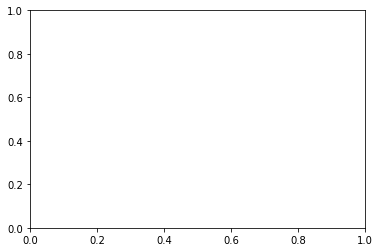

In [59]:
plt.scatter(df[df['shot.outcome.name'] == 'Goal']['goalkeeper_xloc'], df['goalkeeper_yloc'])

In [60]:
df[df['shot.outcome.name'] == 'Goal']['goalkeeper_xloc'].isnull().sum()

2575

In [61]:
df[df['shot.outcome.name'] == 'Saved']['goalkeeper_xloc'].isnull().sum()

5169

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text yticklabel objects>)

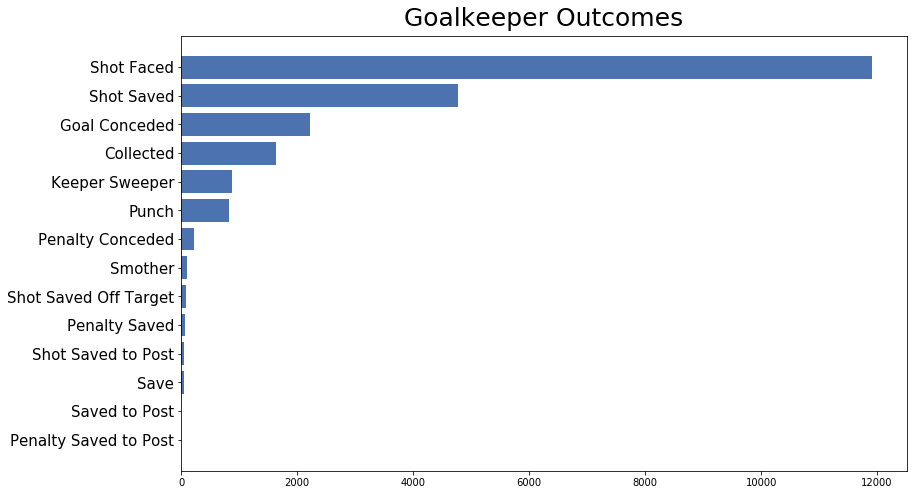

In [62]:
plt.figure(figsize=(13,8))
plt.barh(df.groupby('goalkeeper.type.name').count().sort_values(by='away_score', ascending=True).iloc[:, 0].index, df.groupby('goalkeeper.type.name').count().sort_values(by='away_score', ascending=True).iloc[:, 0].values)
plt.xticks(rotation=0)
plt.title('Goalkeeper Outcomes', size=25, pad=10)
plt.yticks(size=15)

In [63]:
df.head(15)

,away_score,away_team.away_team_gender,away_team.away_team_name,away_team.country.name,competition.competition_name,competition.country_name,competition_stage.name,home_score,home_team.country.name,home_team.home_team_gender,home_team.home_team_id,home_team.home_team_name,kick_off,last_updated,match_date,match_id,match_week,metadata.data_version,referee.name,season.season_id,season.season_name,stadium.country.name,stadium.name,duration,goalkeeper.body_part.name,goalkeeper.outcome.name,goalkeeper.position.name,goalkeeper.technique.name,goalkeeper.type.name,index,minute,period,play_pattern.name,player.name,position.name,possession_team.name,second,shot.body_part.name,shot.freeze_frame,shot.outcome.name,shot.statsbomb_xg,shot.technique.name,shot.type.name,team.name,timestamp,type.name,goalkeeper_xloc,goalkeeper_yloc,x_loc,y_loc,shot_xloc,shot_yloc,shot_zloc
0,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.733565,NaN,NaN,NaN,NaN,NaN,158,3,1,From Throw In,Daniel Alves da Silva,Right Back,Barcelona,18,Right Foot,"[{'location': [109.3, 46.7], 'player': {'id': ...",Saved,0.039837,Normal,Open Play,Barcelona,00:03:18.221,Shot,NaN,NaN,112.0,56.6,118.9,43.8,0.7
1,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,Both Hands,Success,Set,Standing,Shot Saved,159,3,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,18,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:03:18.955,Goal Keeper,NaN,NaN,1.8,37.1,NaN,NaN,NaN
2,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.854500,NaN,NaN,NaN,NaN,NaN,203,4,1,From Free Kick,Lionel Andrés Messi Cuccittini,Right Wing,Barcelona,43,Left Foot,"[{'location': [104.4, 34.1], 'player': {'id': ...",Goal,0.105479,Normal,Open Play,Barcelona,00:04:43.673,Shot,NaN,NaN,103.0,34.2,120.0,41.8,0.2
3,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,No Touch,Set,Diving,Goal Conceded,204,4,1,From Free Kick,Andrés Palop Cervera,Goalkeeper,Barcelona,44,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:04:44.527,Goal Keeper,NaN,NaN,4.3,42.1,NaN,NaN,NaN
4,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,Success,NaN,NaN,Collected,418,9,1,From Keeper,Víctor Valdés Arribas,Goalkeeper,Barcelona,15,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:09:15.043,Goal Keeper,NaN,NaN,7.6,40.3,NaN,NaN,NaN
5,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,0.000000,NaN,In Play Safe,NaN,NaN,Punch,685,16,1,From Throw In,Andrés Palop Cervera,Goalkeeper,Barcelona,28,NaN,NaN,NaN,NaN,NaN,NaN,Sevilla,00:16:28.029,Goal Keeper,NaN,NaN,8.6,44.9,NaN,NaN,NaN
6,3.0,male,Barcelona,Spain,La Liga,Spain,Regular Season,2.0,Spain,male,213.0,Sevilla,2020-07-18 21:00:00,2019-12-16 23:09:16.168756,2010-05-08,69239,37.0,1.1.0,Alberto Undiano,21.0,2009/2010,Spain,Estadio Ramón Sánchez Pizjuán,1.104565,NaN,NaN,NaN,NaN,NaN,951,22,1,From Free Kick,Daniel Alves da Silva,Right Back,Barcelona,44,Right Foot,"[{'location': [98.5, 50.8], 'player': {'id': 5...",Wayward,0.039296,Half Volley,Open Play,Barcelona,00:22:44.425,Shot,NaN,Na

In [64]:
def semi_circle(ax):
    arc = matplotlib.patches.Circle((12, 40), 10, fill=False)
    white_rec = matplotlib.patches.Rectangle((0, 20), 18, 40, color='w' )
    ax.add_patch(arc)
    ax.add_patch(white_rec)
    ax.set_xlim(right=120, emit=False)
    ax.set_ylim(bottom=0, top=80)

No handles with labels found to put in legend.


([], <a list of 0 Text yticklabel objects>)

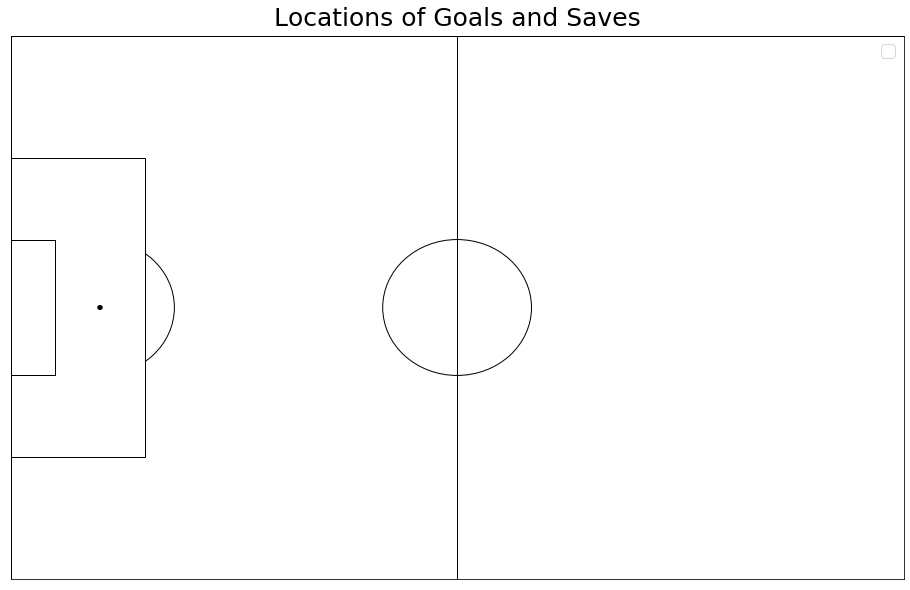

In [66]:
fig, ax = plt.subplots(figsize=(16,10))
plt.title('Locations of Goals and Saves', size=25, pad=10)
yard_box = matplotlib.patches.Rectangle((0, 18), 18, 44, lw=1, fill=False)
field = matplotlib.patches.Rectangle((0, 0), 120, 80, lw=1, fill=False)
sm_yardbox = matplotlib.patches.Rectangle((0, 30), 6, 20, lw=1, fill=False)
center_cr = matplotlib.patches.Circle((60, 40), 10, fill=False)
penalty_mark = matplotlib.patches.Circle((12, 40), 0.3, color='k')
semi_circle(ax)
ax.add_patch(penalty_mark)
ax.add_patch(center_cr)
ax.add_patch(sm_yardbox)
ax.add_patch(yard_box)
ax.add_patch(field)
plt.vlines(60, 0, 80, lw=1)
#plt.ylim(-5, 85)
#plt.xlim(-5, 65)
#plt.scatter(df[df['goalkeeper.type.name'] == 'Shot Saved']['x_loc'], df[df['goalkeeper.type.name'] == 'Shot Saved']['y_loc'], label = 'Saved', alpha=0.2) 
#plt.scatter(df[df['goalkeeper.type.name'] == 'Goal Conceded']['x_loc'], df[df['goalkeeper.type.name'] == 'Goal Conceded']['y_loc'], color='red', label = 'Goal', alpha=0.2) 
plt.legend(fontsize='xx-large')
plt.xticks([])
plt.yticks([])

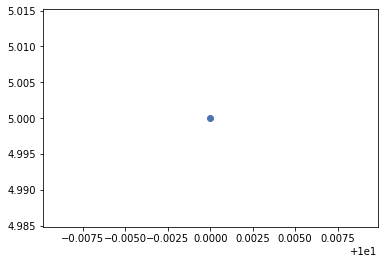

In [67]:
plt.figure()
yard_box = matplotlib.patches.Rectangle((18, 0), 18, 44, lw=3, fill=False)
ax.add_patch(yard_box)
plt.scatter(10, 5)